## Factor Analysis

In this introductory tutorial, we go through the different steps of an scBTF workflow.



In [1]:
import scanpy as sc
from rich import print
from scBTF import SingleCellTensor, SingleCellBTF, FactorizationSet

/usr/local/anaconda3/envs/minim_pyro/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%config InlineBackend.figure_formats = ['png2x']
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.9.3 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8


### Loading and preparing data

Let us first load a subsampled version of the heart cell atlas dataset described in Litviňuková et al. (2020). scvi-tools has many “built-in” datasets as well as support for loading arbitrary .csv, .loom, and .h5ad (AnnData) files. Please see our tutorial on data loading for more examples.

Litviňuková, M., Talavera-López, C., Maatz, H., Reichart, D., Worth, C. L., Lindberg, E. L., … & Teichmann, S. A. (2020). Cells of the adult human heart. Nature, 588(7838), 466-472.

In [3]:
adata = sc.read_h5ad('data/subset_adata.h5ad')
print(adata.shape)

(25605, 1129)

In [4]:
sc_tensor = SingleCellTensor.from_anndata(
    adata, sample_label="donor", celltype_label="cell_types_level_3", hgnc_approved_genes_only=True, normalize=True
)
sc_tensor.tensor = sc_tensor.tensor.round()
print(f"Tensor shape :  {sc_tensor.tensor.shape} ")

Building tensor from matrix: 100%|██████████| 15/15 [00:00<00:00, 76.81it/s]


Tensor shape :  (15, 15, 1072)

In [5]:
factorization_set = SingleCellBTF.factorize(
    sc_tensor = sc_tensor, rank = [4,6,8,10,12,14,16,18,20,22,24,26,28], model = 'gamma_poisson', n_restarts = 4, num_steps = 1500,
    init_alpha = 100., plot_var_explained = False
)

Decomposing tensor of shape torch.Size([15, 15, 1072]) into rank 4 matrices


100%|██████████| 4/4 [01:45<00:00, 26.41s/it]


Decomposing tensor of shape torch.Size([15, 15, 1072]) into rank 6 matrices


100%|██████████| 4/4 [02:02<00:00, 30.69s/it]


Decomposing tensor of shape torch.Size([15, 15, 1072]) into rank 8 matrices


100%|██████████| 4/4 [02:34<00:00, 38.54s/it]


Decomposing tensor of shape torch.Size([15, 15, 1072]) into rank 10 matrices


100%|██████████| 4/4 [02:24<00:00, 36.20s/it]


Decomposing tensor of shape torch.Size([15, 15, 1072]) into rank 12 matrices


100%|██████████| 4/4 [02:57<00:00, 44.26s/it]


Decomposing tensor of shape torch.Size([15, 15, 1072]) into rank 14 matrices


100%|██████████| 4/4 [02:25<00:00, 36.34s/it]


Decomposing tensor of shape torch.Size([15, 15, 1072]) into rank 16 matrices


100%|██████████| 4/4 [02:32<00:00, 38.13s/it]


Decomposing tensor of shape torch.Size([15, 15, 1072]) into rank 18 matrices


100%|██████████| 4/4 [02:46<00:00, 41.57s/it]


Decomposing tensor of shape torch.Size([15, 15, 1072]) into rank 20 matrices


100%|██████████| 4/4 [02:46<00:00, 41.56s/it]


Decomposing tensor of shape torch.Size([15, 15, 1072]) into rank 22 matrices


100%|██████████| 4/4 [03:18<00:00, 49.51s/it]


Decomposing tensor of shape torch.Size([15, 15, 1072]) into rank 24 matrices


100%|██████████| 4/4 [03:19<00:00, 49.92s/it]


Decomposing tensor of shape torch.Size([15, 15, 1072]) into rank 26 matrices


100%|██████████| 4/4 [03:14<00:00, 48.55s/it]


Decomposing tensor of shape torch.Size([15, 15, 1072]) into rank 28 matrices


100%|██████████| 4/4 [02:52<00:00, 43.04s/it]


/usr/local/anaconda3/envs/minim_pyro/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/anaconda3/envs/minim_pyro/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/anaconda3/envs/minim_pyro/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/anaconda3/envs/minim_pyro/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/anaconda3/envs/minim_pyro/lib

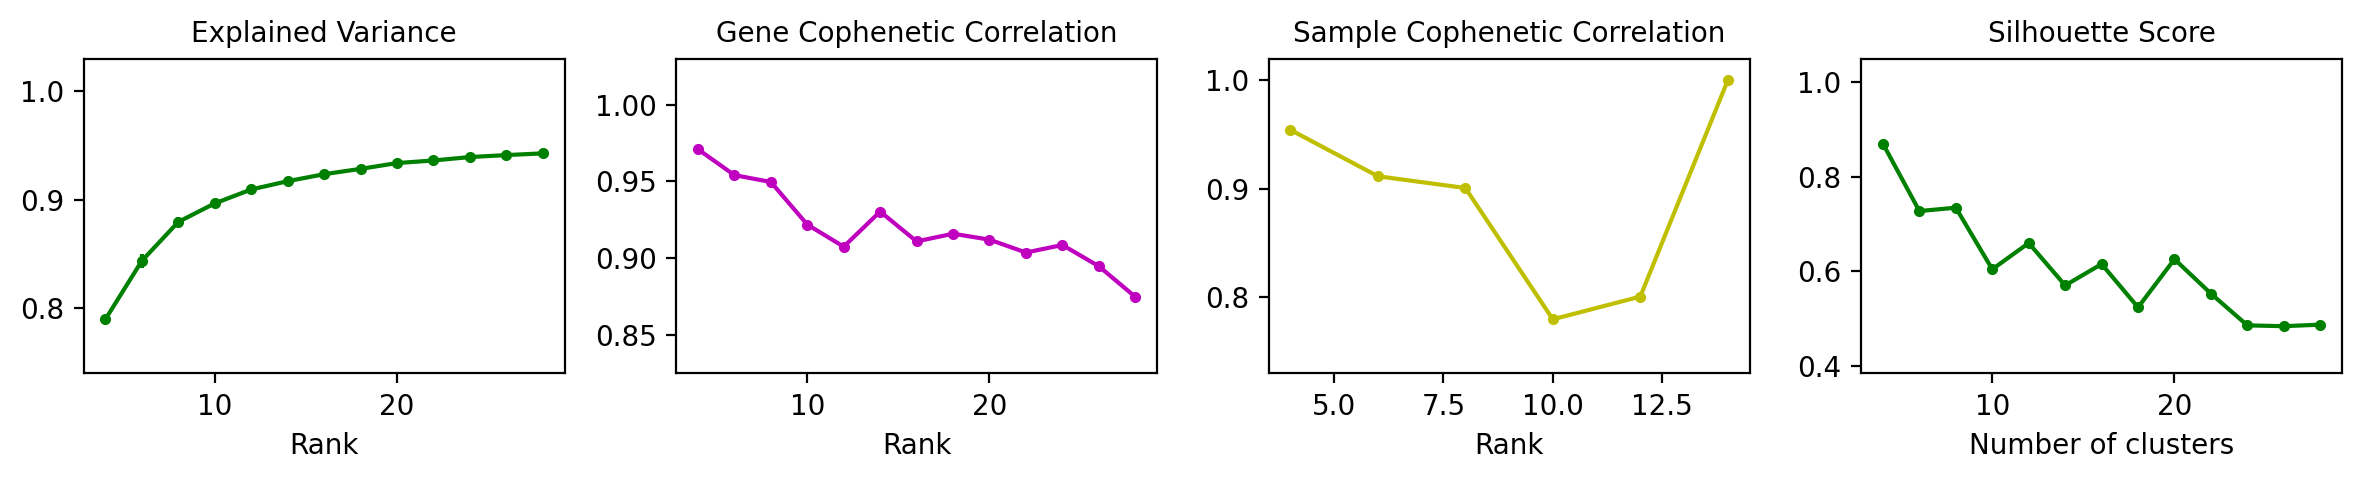

In [9]:
fig = factorization_set.rank_metrics_plot(max_parallel_threads=1)